In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [284]:
data = pd.read_csv(r"C:\Users\Sravani\Downloads\insh\bank telemarketing\archive (2)\bank-additional-full1.csv")

In [285]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [286]:
data.shape

(41188, 21)

In [287]:
#checking for duplicates
data.duplicated().sum()

12

duplicates are there in the dataset, so we need to remove duplicates 

In [288]:
data.drop_duplicates(inplace=True)

In [289]:
data.duplicated().sum()

0

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

all the variables have correct data type and i rename the target variable from y to subscribe so that it will be easier to understand exploratory data analysis

In [291]:
data.rename(columns = {'y' : 'subscribe'}, inplace=True)

In [292]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

In [293]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

In [294]:
numerical_features = data.select_dtypes(include=['int', 'float'])
categorical_features = data.select_dtypes(exclude=['int', 'float']).drop(columns='subscribe')

In [295]:
numerical_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [296]:
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


# Univariate Analysis

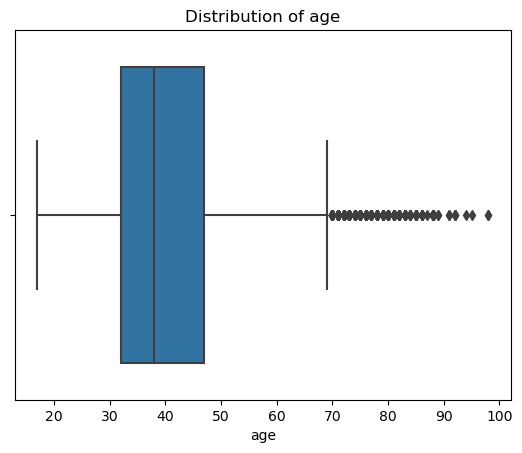

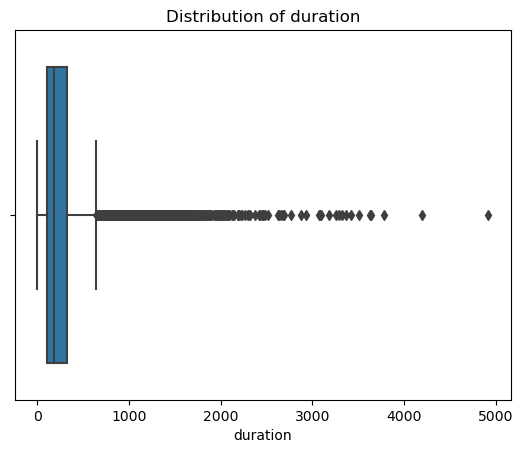

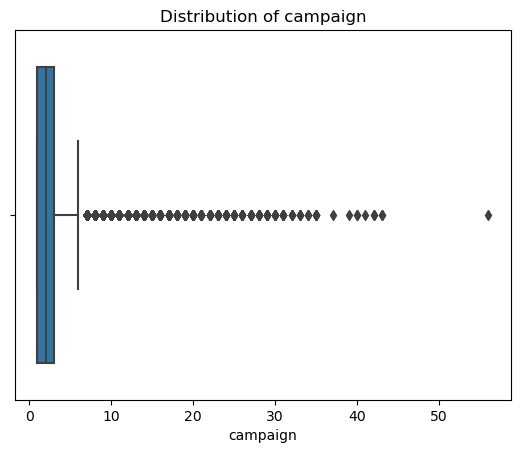

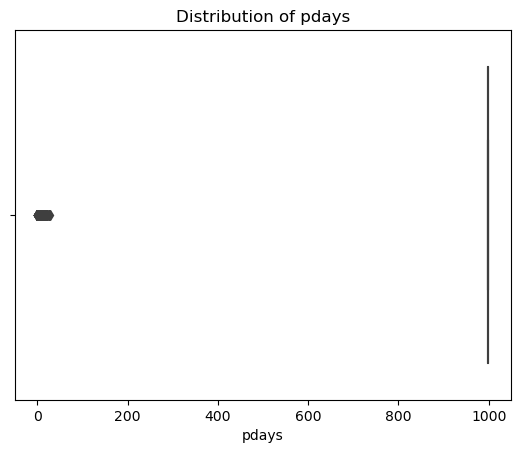

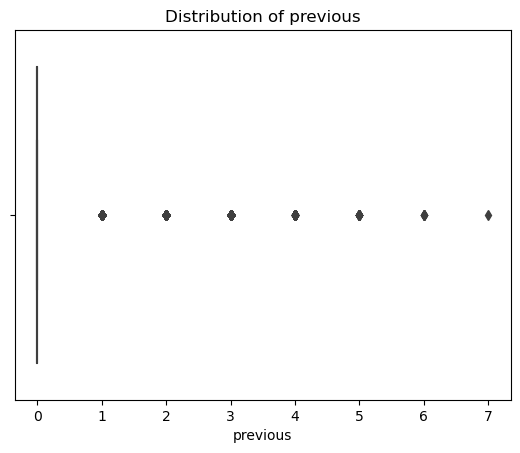

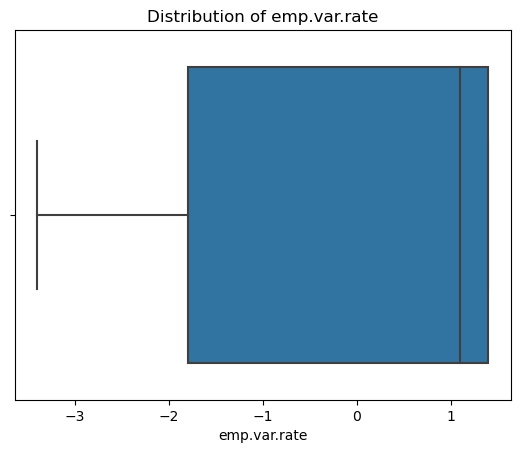

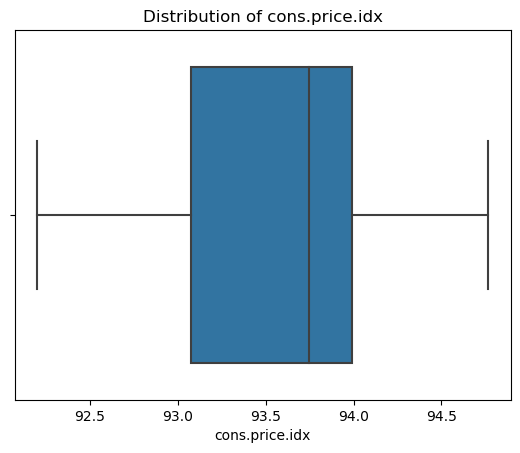

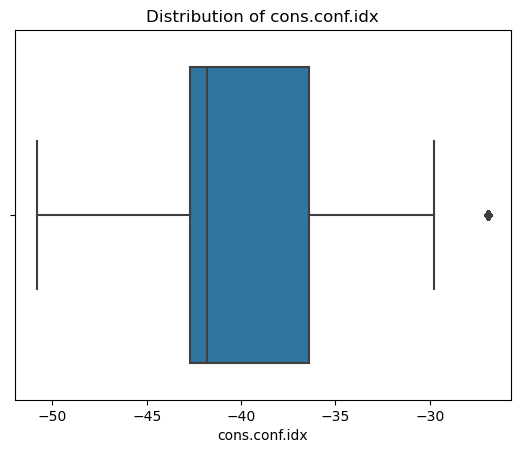

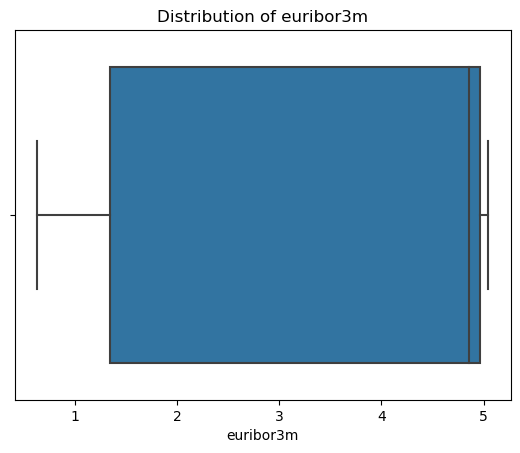

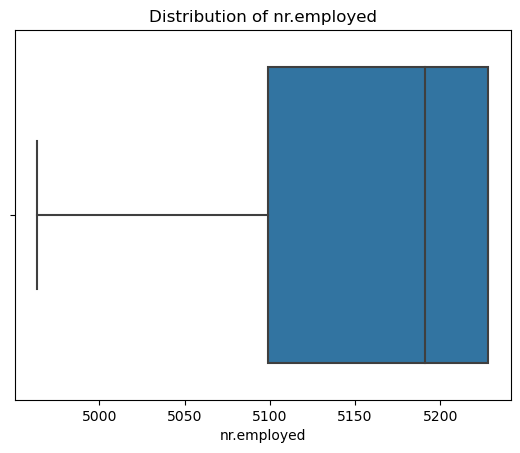

In [297]:
for col in numerical_features.columns:
    sns.boxplot(x = numerical_features[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [298]:
numerical_features.describe(percentiles = [.80, .85, .90, .95, .99]).T

,count,mean,std,min,50%,80%,85%,90%,95%,99%,max
age,41176.0,40.023800,10.420680,17.000,38.000,49.000,52.000,55.000,58.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,180.000,368.000,439.000,551.000,753.000,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,2.000,3.000,4.000,5.000,7.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,1.000,1.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,1.100,1.400,1.400,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.749,93.994,93.994,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-41.800,-36.400,-36.100,-36.100,-33.600,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,4.857,4.962,4.963,4.964,4.966,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100,5228.100


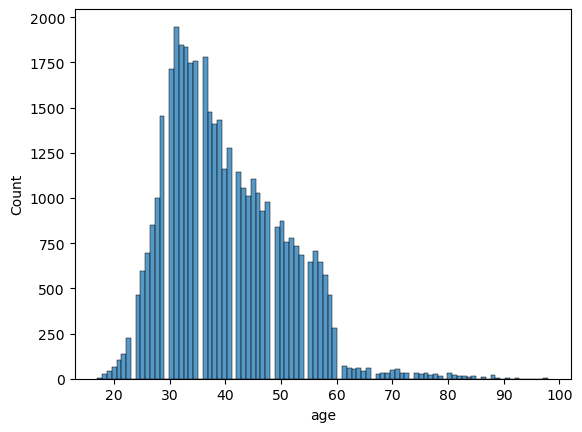

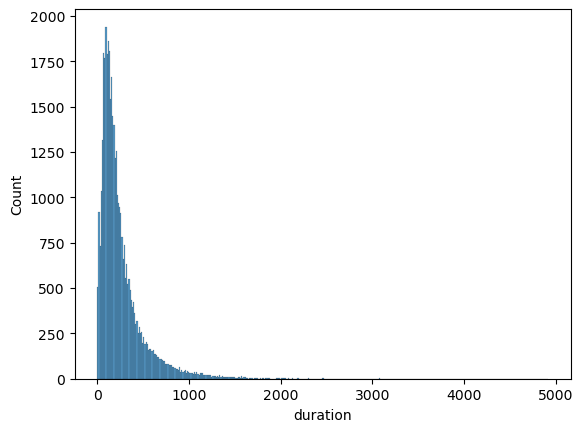

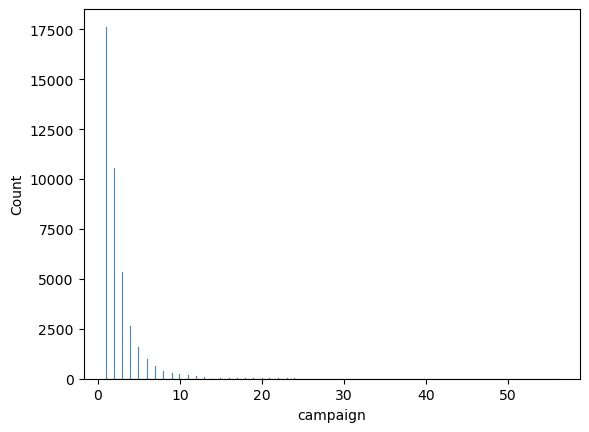

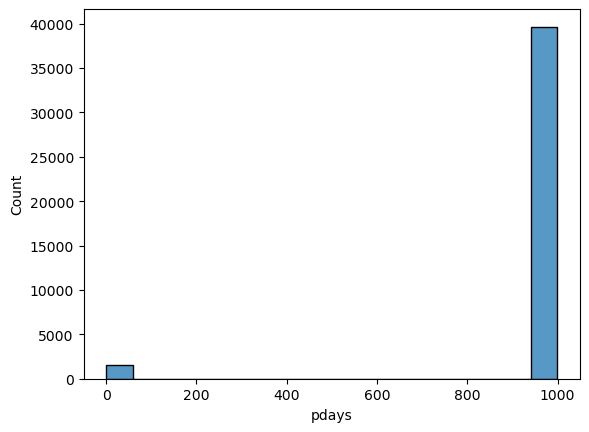

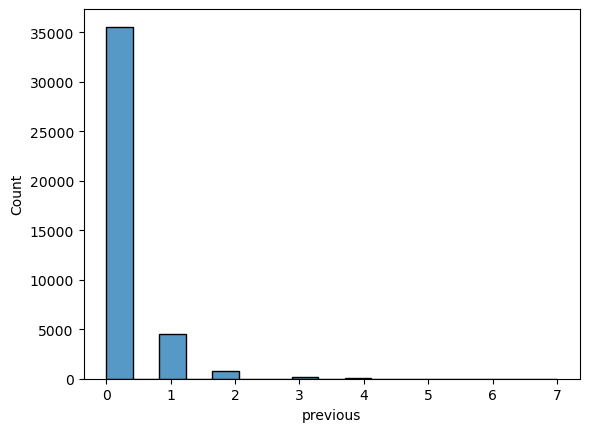

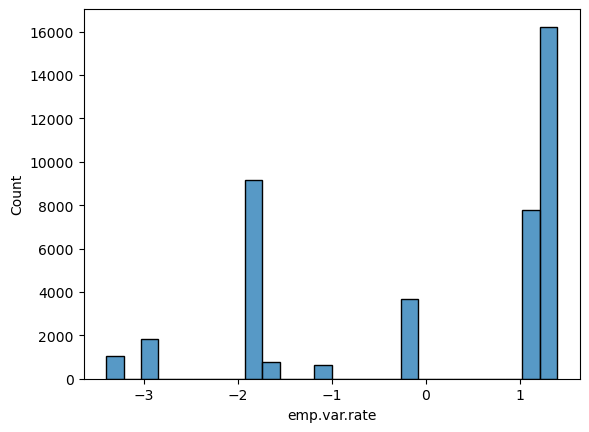

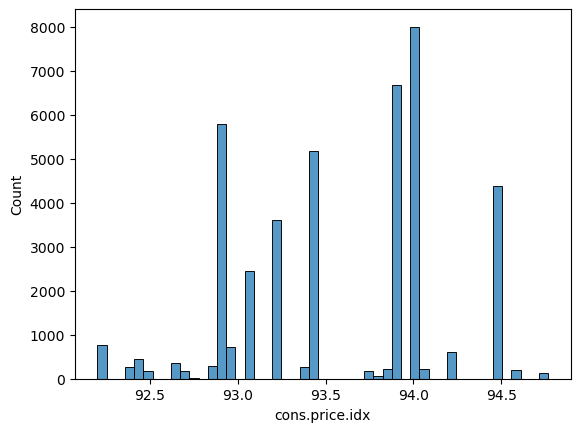

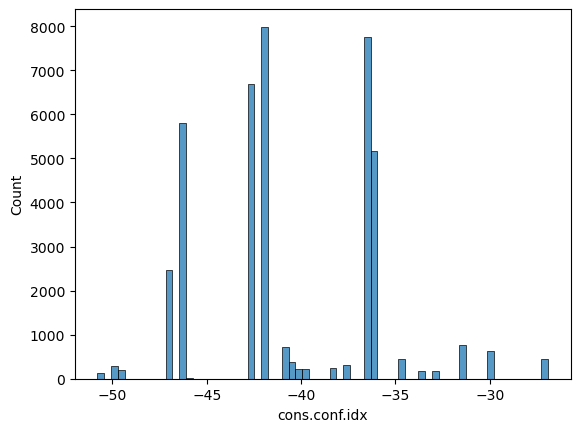

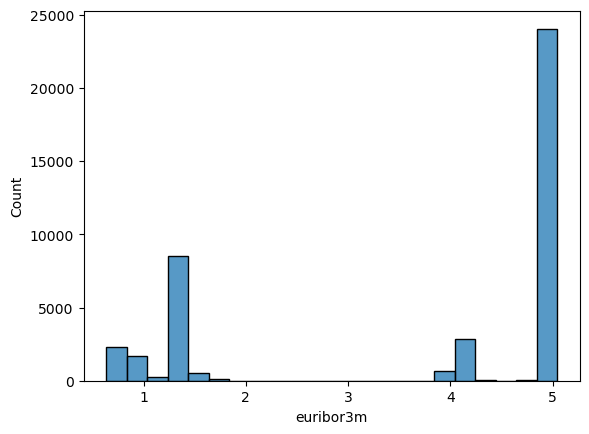

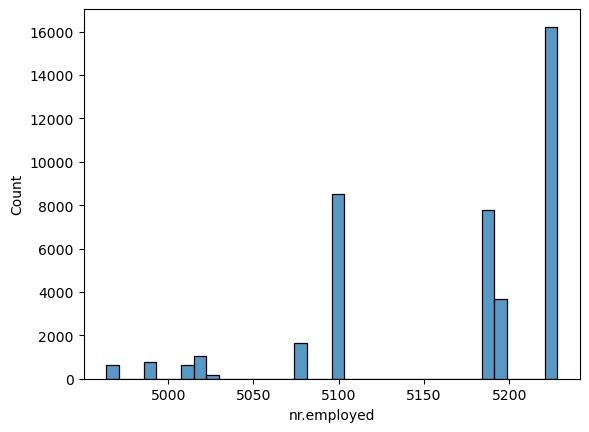

In [299]:
for col in numerical_features.columns:
    sns.histplot(x = numerical_features[col])
    plt.show()

In [300]:
data['pdays'].value_counts()

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [301]:
data['previous'].value_counts()

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

the findings from the from the analysis of numerical features 
* age -- age variable has skewed distribution with median age is 38 and it shows some outliers but we can not treat them as outliers since the range of values for age variable between 17 to 98, which presents true variability of variable.
* duration -- duration variable has skewness in it where the median duration is 180 seconds and maximum duration is 4918 seconds
* campaign -- the minimum number of contacts performed for any customer is 1 and maximum number of contacts performed for any customer is 56.
* p days -- most of the customers were not previously contacted 
* previous -- contacts were not performed to most number of customers before this campaign

In [302]:
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [303]:
for col in categorical_features.columns:
    print(f"values counts of {col}")
    print(categorical_features[col].value_counts())
    print("**************************************")
    print()

values counts of job
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
**************************************

values counts of marital
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
**************************************

values counts of education
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
**************************************

values counts of default
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
*****************

most of the categorical features of unknown category which indicates missing data, so i handle misisng data using imputaion techniques here

In [304]:
for col in categorical_features.columns:
    categorical_features[col] = categorical_features[col].replace('unknown', np.nan)

In [305]:
categorical_features.isnull().sum()

job             330
marital          80
education      1730
default        8596
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
dtype: int64

In [306]:
categorical_features['job'] = categorical_features['job'].fillna(categorical_features['job'].mode()[0])
categorical_features['marital'] = categorical_features['marital'].fillna(categorical_features['marital'].mode()[0])
categorical_features['education'] = categorical_features['education'].fillna(categorical_features['education'].mode()[0])
categorical_features['default'] = categorical_features['default'].fillna(categorical_features['default'].mode()[0])
categorical_features['housing'] = categorical_features['housing'].fillna(categorical_features['housing'].mode()[0])
categorical_features['loan'] = categorical_features['loan'].fillna(categorical_features['loan'].mode()[0])

In [307]:
categorical_features.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

there are no missing values no but values in some categorical features have inconsistent format so we handle them

In [308]:
categorical_features['job'] = categorical_features['job'].replace({'admin.': 'admin'})

In [309]:
categorical_features['education'] = categorical_features['education'].replace({'university.degree':'university',
                                                                              'high.school':'high_school',
                                                                              'basic.9y':'basic',
                                                                              'professional.course':'professional_course',
                                                                              'basic.4y':'basic',
                                                                              'basic.6y':'basic'})

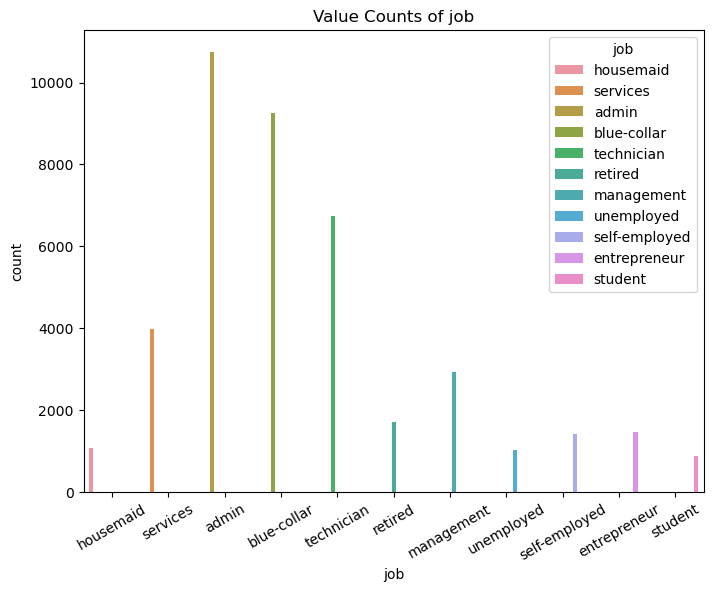

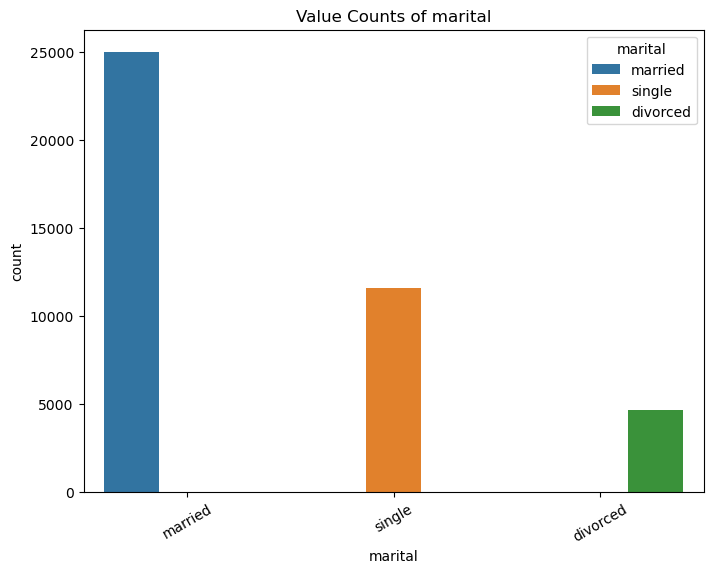

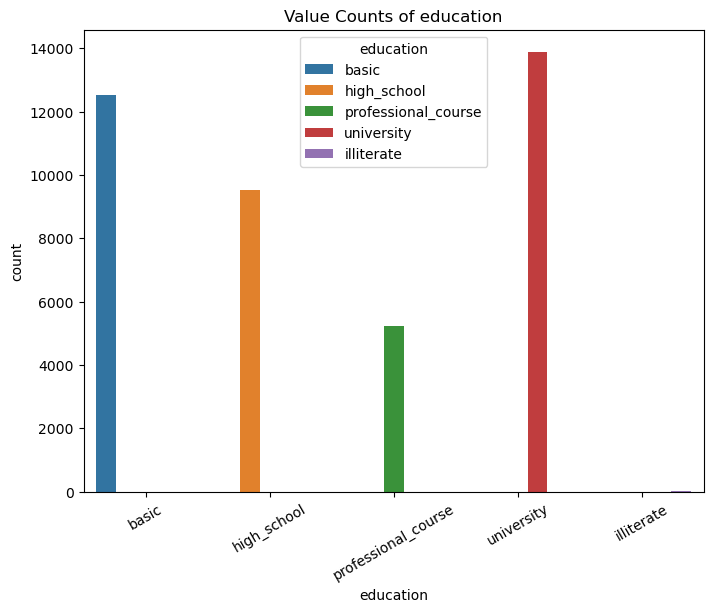

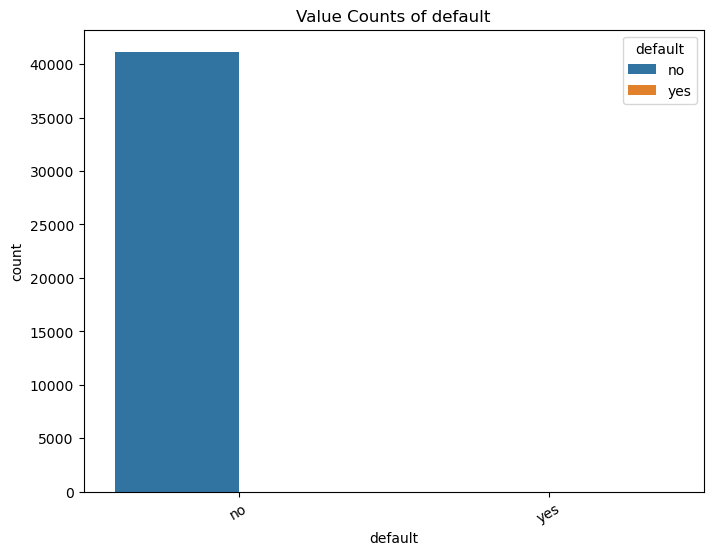

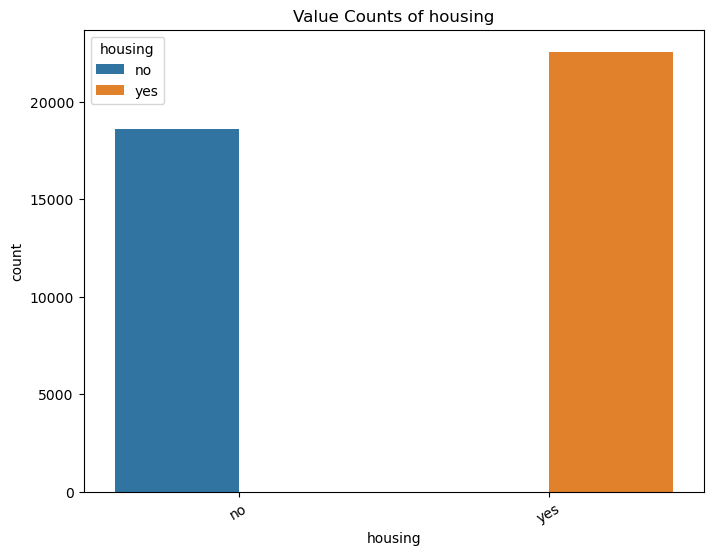

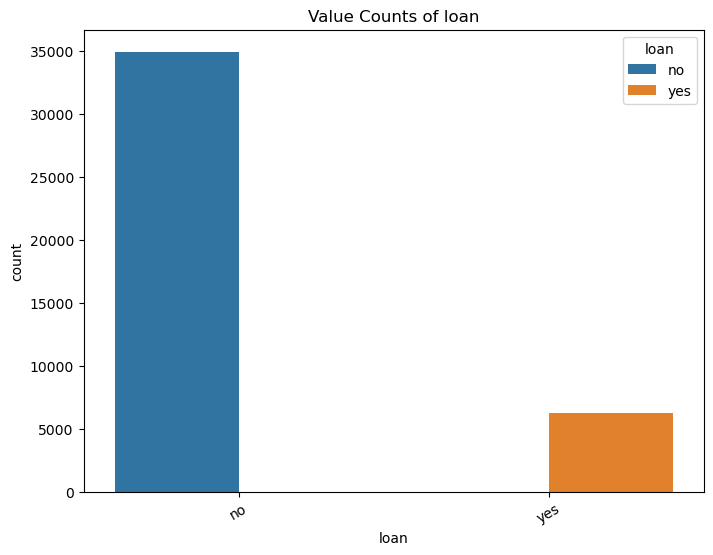

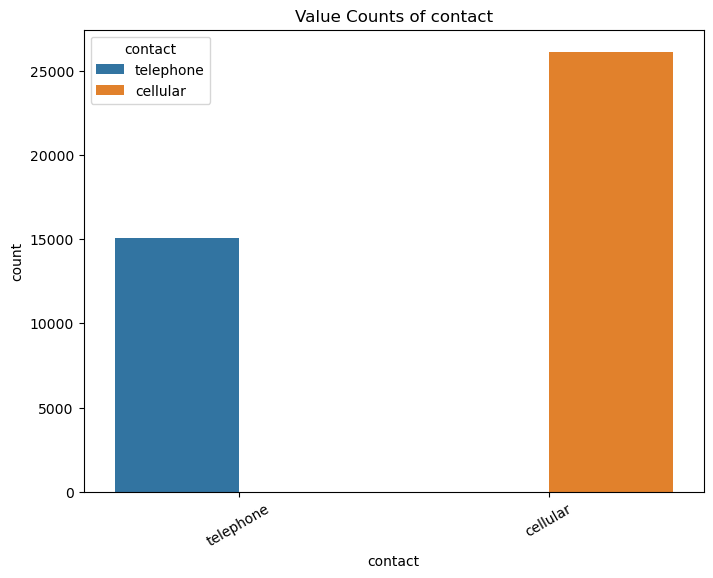

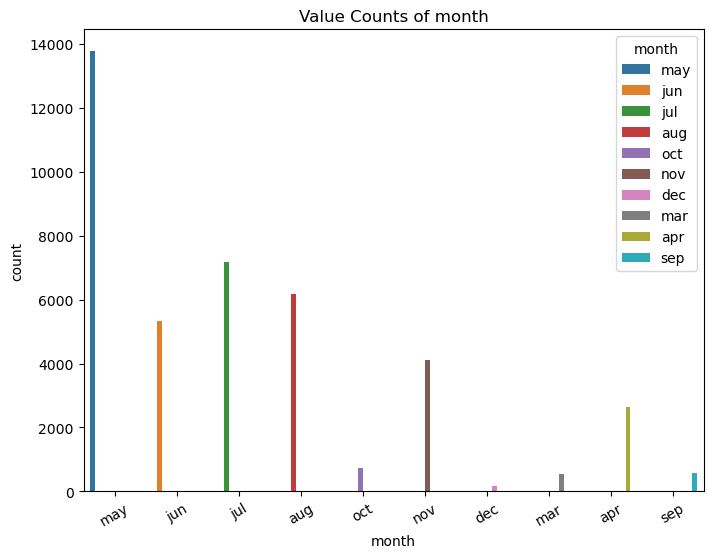

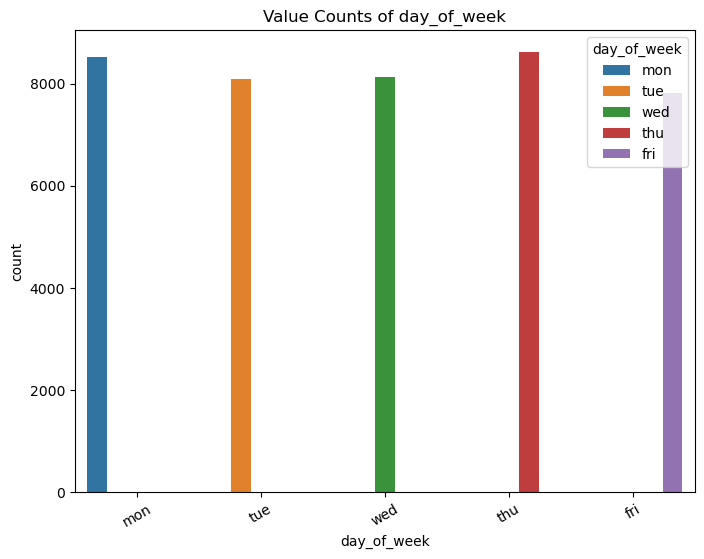

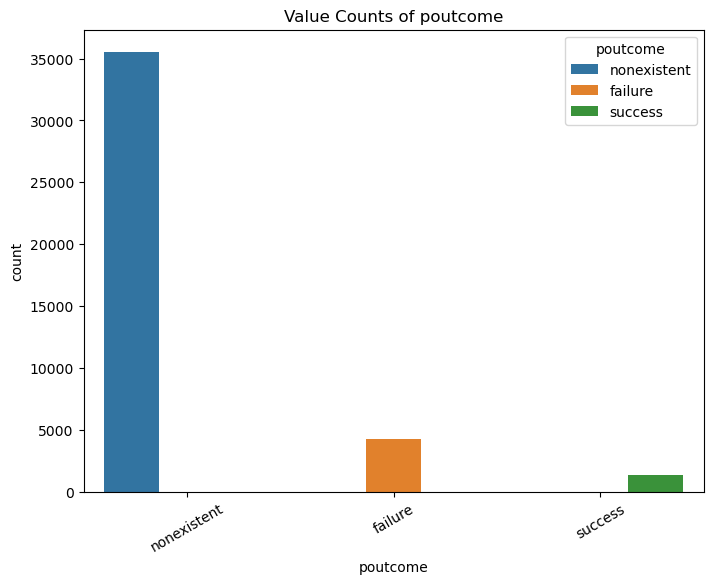

In [310]:
for col in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x = col, data = categorical_features, hue = col)
    plt.title(f"Value Counts of {col}")
    plt.xticks(rotation=30)
    plt.show()

The findings from the ananlysis of categorical features
* job --26% of the customers have admin job and there are less percentage customers which is 0.02, who are students.
* marital -- 60% of the customers are married, 28% of customer are single and remaining are divorced which is around 125.
* education -- 33% have university degree, 30% have basic education, 23% are high school graduates, 12% have professinal course                and 0.002% are illliterate.
* default -- most of the customers are non-default.
* housing -- 55% customers have housing loan and 45% customers does not have housing loan.
* loan -- 85% customers have housing loan and 15% customers does not have housing loan.
* contact -- 63% customer are communicated through cellular and 375 customers are contacted through telephone.
* month -- 33% of total contacts made in may month and least percent which is 0.004% contacts made in december month.
* day of week -- from monday to friday almost same percentage of contacts made in each day.
* potcome -- the success of previous campaign is 0.03%

In [311]:
target_variable = data['subscribe'].value_counts()

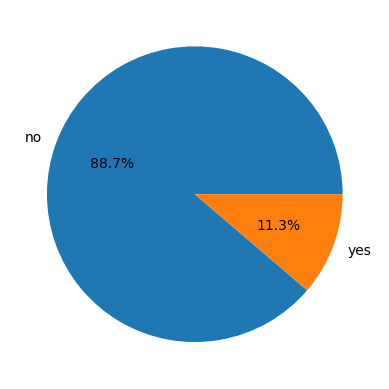

In [312]:
plt.pie(target_variable.values, labels = target_variable.index, autopct= "%1.1f%%")
plt.show()

the percentage of customers who subscribe to term deposit is 11.3%

In [313]:
data1 = pd.concat([numerical_features, categorical_features], axis = 1)
data1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic,no,no,no,telephone,may,mon,nonexistent
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,no,telephone,may,mon,nonexistent
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,yes,no,telephone,may,mon,nonexistent
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin,married,basic,no,no,no,telephone,may,mon,nonexistent
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,yes,telephone,may,mon,nonexistent


In [314]:
data1['subscribe'] = data['subscribe']
data1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribe
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin,married,basic,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,yes,telephone,may,mon,nonexistent,no


# Bivariate Analysis

In [315]:
numerical_features.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


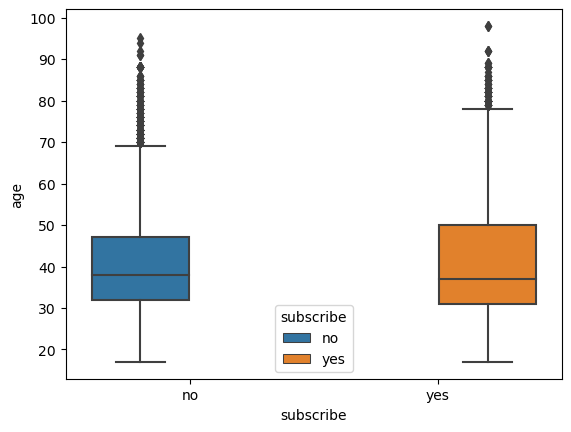

In [316]:
#distribution of age by subscription

sns.boxplot(x = 'subscribe', y = 'age', data = data1, hue = 'subscribe')
plt.show()

In [317]:
data1.groupby('subscribe')['age'].mean()

subscribe
no     39.910994
yes    40.912266
Name: age, dtype: float64

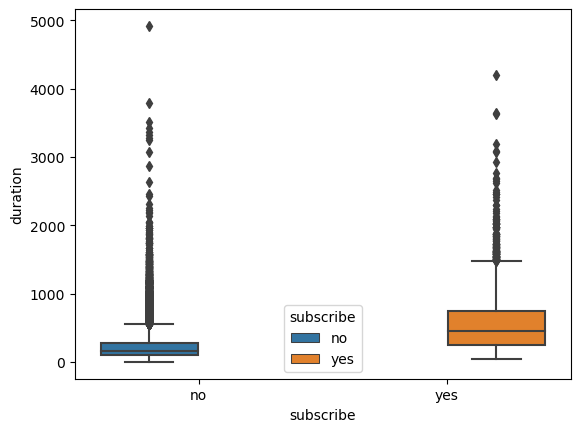

In [318]:
# distribution of duration by subscription

sns.boxplot(x = 'subscribe', y = 'duration', data = data1, hue = 'subscribe')
plt.show()

In [319]:
data1.groupby('subscribe')['duration'].mean()

subscribe
no     220.868079
yes    553.256090
Name: duration, dtype: float64

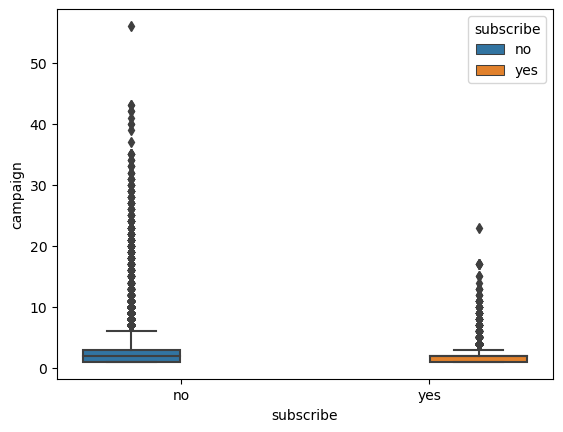

In [320]:
# distribution of campaign by subscrption

sns.boxplot(x = 'subscribe', y = 'campaign', data = data1, hue = 'subscribe')
plt.show()

In [321]:
data1.groupby('subscribe')['campaign'].mean()

subscribe
no     2.633385
yes    2.051951
Name: campaign, dtype: float64

In [322]:
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic,no,no,no,telephone,may,mon,nonexistent
1,services,married,high_school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high_school,no,yes,no,telephone,may,mon,nonexistent
3,admin,married,basic,no,no,no,telephone,may,mon,nonexistent
4,services,married,high_school,no,no,yes,telephone,may,mon,nonexistent


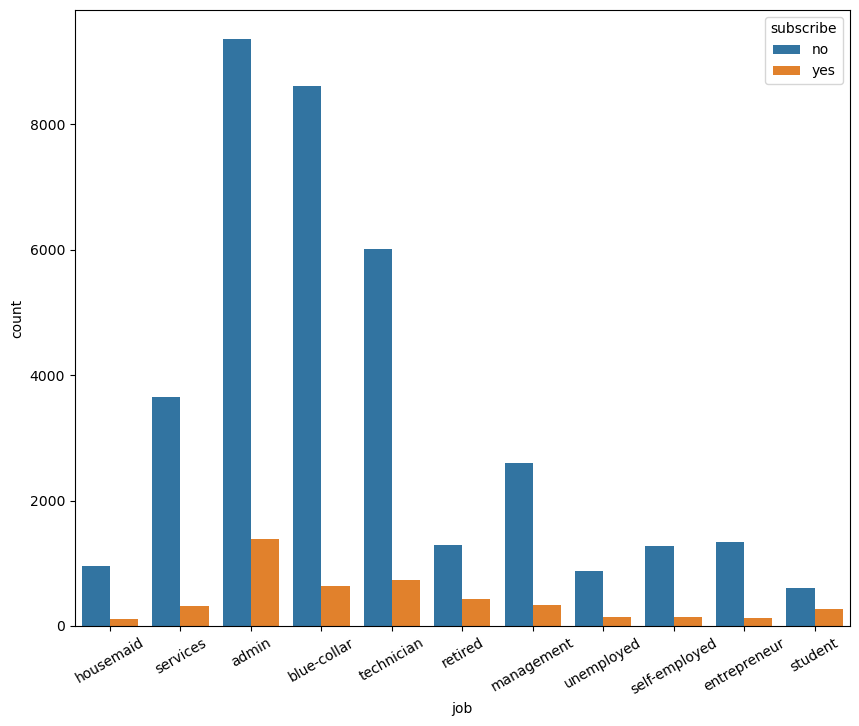

In [323]:
# Counts of job by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'job', data = data1, hue = 'subscribe')
plt.xticks(rotation=30)
plt.show()

In [324]:
pd.crosstab(index = data1['job'], columns = data1['subscribe'], margins = True, margins_name = 'total')

subscribe,no,yes,total
job,,,
admin,9361,1388,10749
blue-collar,8615,638,9253
entrepreneur,1332,124,1456
housemaid,954,106,1060
management,2596,328,2924
retired,1284,434,1718
self-employed,1272,149,1421
services,3644,323,3967
student,600,275,875


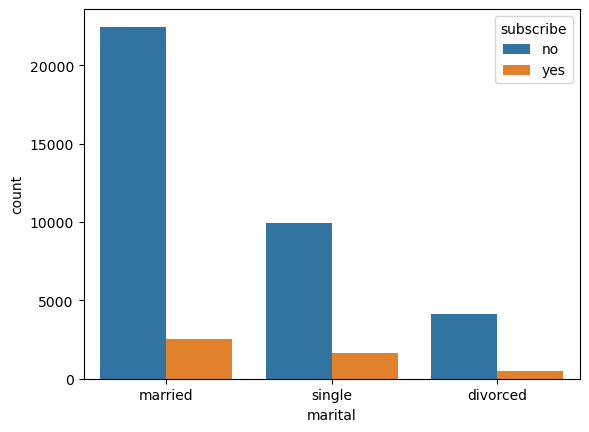

In [325]:
# martial counts by subscription

sns.countplot(x = 'marital', data = data1, hue = 'subscribe')
plt.show()

In [326]:
pd.crosstab(index = data1['marital'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
marital,,,
divorced,4135,476,4611
married,22458,2543,25001
single,9944,1620,11564
total,36537,4639,41176


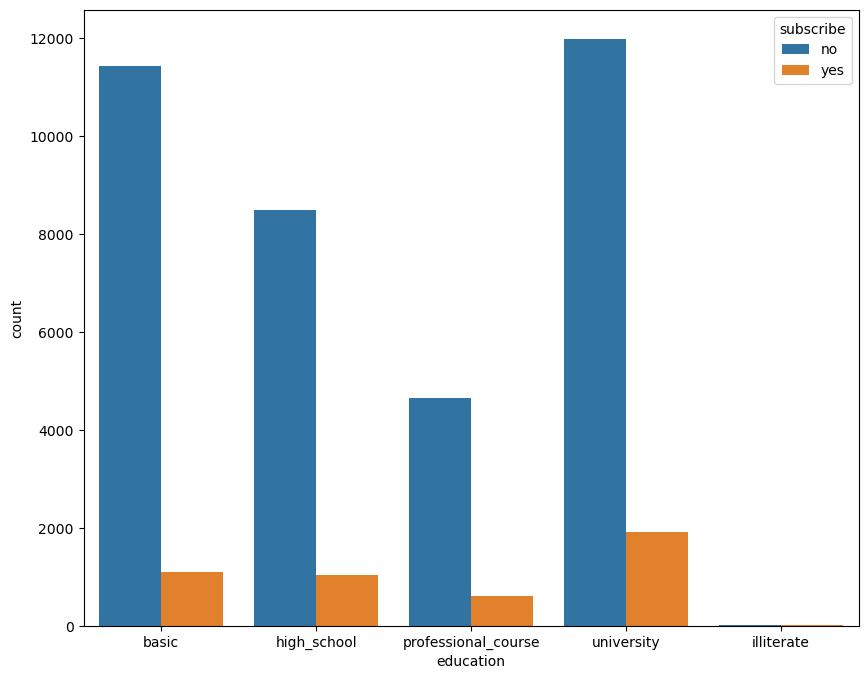

In [327]:
# Counts of education by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'education', data = data1, hue = 'subscribe')
plt.show()

In [328]:
pd.crosstab(index = data1['education'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
education,,,
basic,11423,1089,12512
high_school,8481,1031,9512
illiterate,14,4,18
professional_course,4645,595,5240
university,11974,1920,13894
total,36537,4639,41176


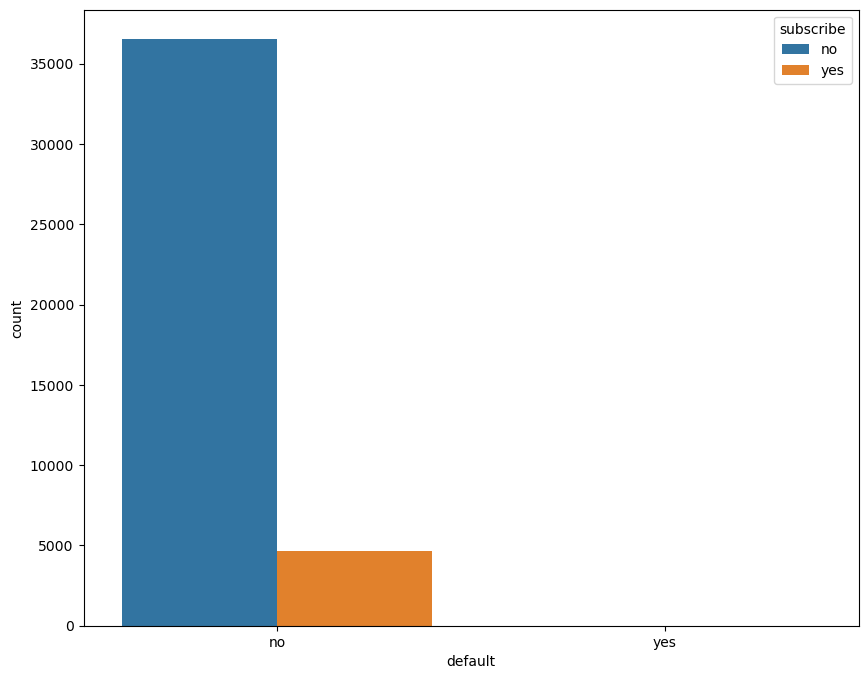

In [329]:
# Counts of default by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'default', data = data1, hue = 'subscribe')
plt.show()

In [330]:
pd.crosstab(index = data1['default'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
default,,,
no,36534,4639,41173
yes,3,0,3
total,36537,4639,41176


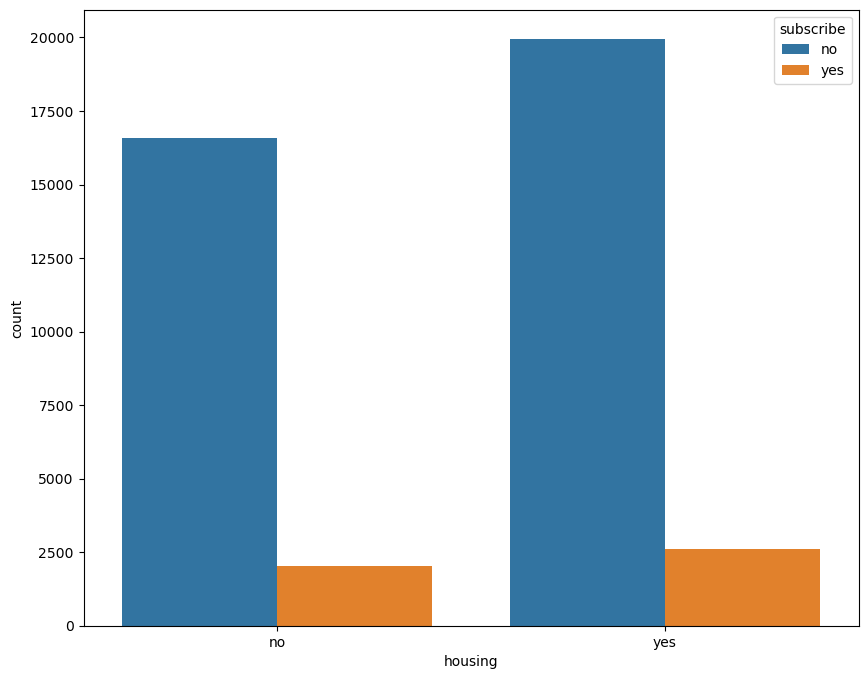

In [331]:
# Counts of housing by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'housing', data = data1, hue = 'subscribe')
plt.show()

In [332]:
pd.crosstab(index = data1['housing'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
housing,,,
no,16590,2025,18615
yes,19947,2614,22561
total,36537,4639,41176


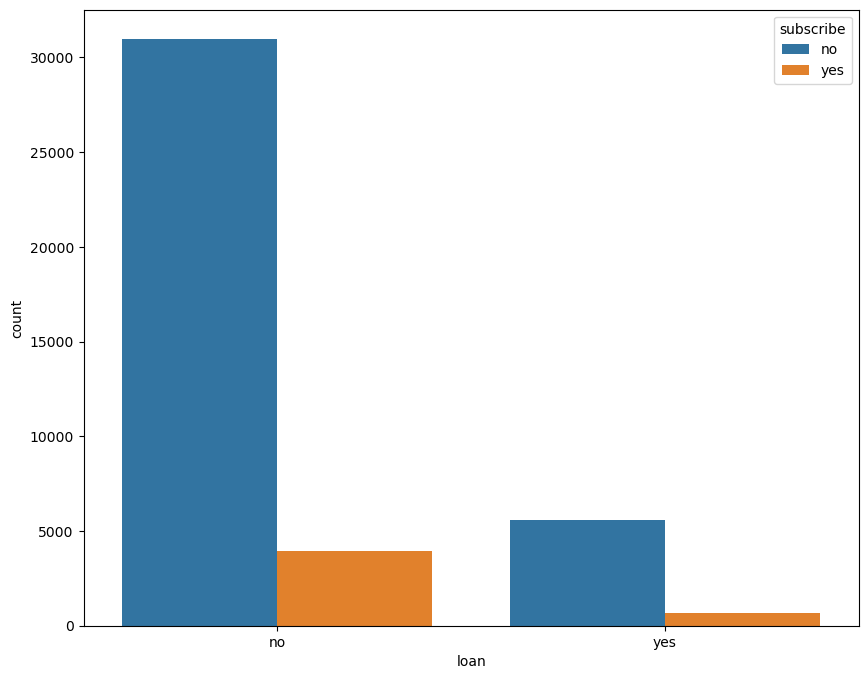

In [333]:
# Counts of loan by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'loan', data = data1, hue = 'subscribe')
plt.show()

In [334]:
pd.crosstab(index = data1['loan'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
loan,,,
no,30972,3956,34928
yes,5565,683,6248
total,36537,4639,41176


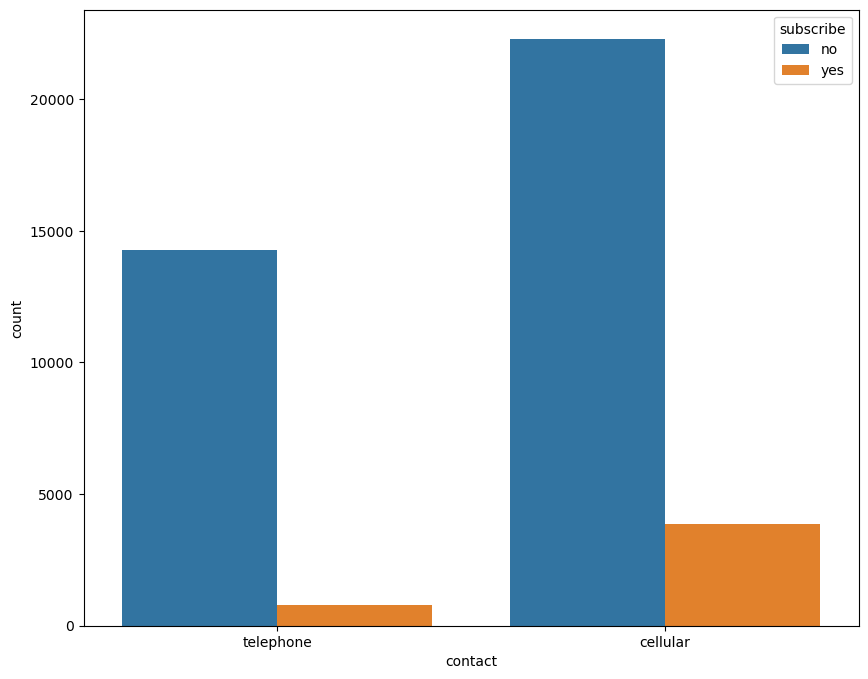

In [335]:
# Counts of contact by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'contact', data = data1, hue = 'subscribe')
plt.show()

In [336]:
pd.crosstab(index = data1['contact'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
contact,,,
cellular,22283,3852,26135
telephone,14254,787,15041
total,36537,4639,41176


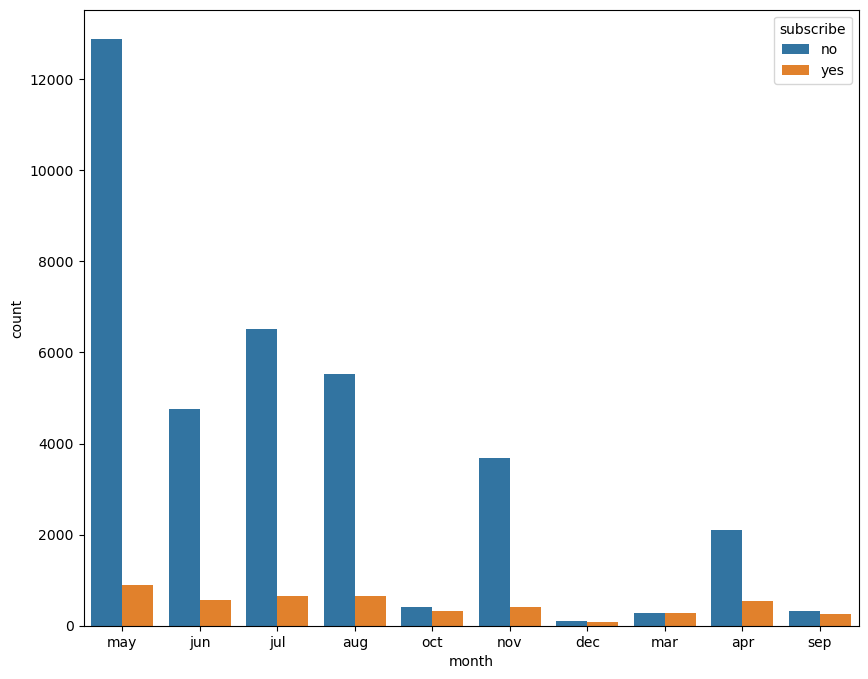

In [337]:
# Counts of month by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'month', data = data1, hue = 'subscribe')
plt.show()

In [338]:
pd.crosstab(index = data1['month'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
month,,,
apr,2092,539,2631
aug,5521,655,6176
dec,93,89,182
jul,6521,648,7169
jun,4759,559,5318
mar,270,276,546
may,12881,886,13767
nov,3684,416,4100
oct,402,315,717


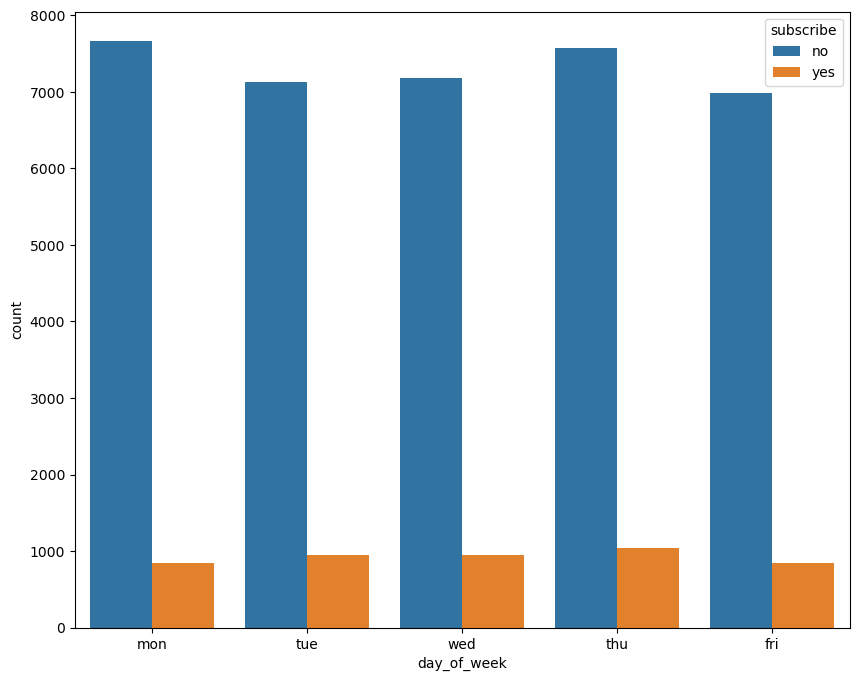

In [339]:
# Counts of day_of_week by subscrption

plt.figure(figsize=(10, 8))
sns.countplot(x = 'day_of_week', data = data1, hue = 'subscribe')
plt.show()

In [340]:
pd.crosstab(index = data1['day_of_week'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
day_of_week,,,
fri,6980,846,7826
mon,7665,847,8512
thu,7574,1044,8618
tue,7133,953,8086
wed,7185,949,8134
total,36537,4639,41176


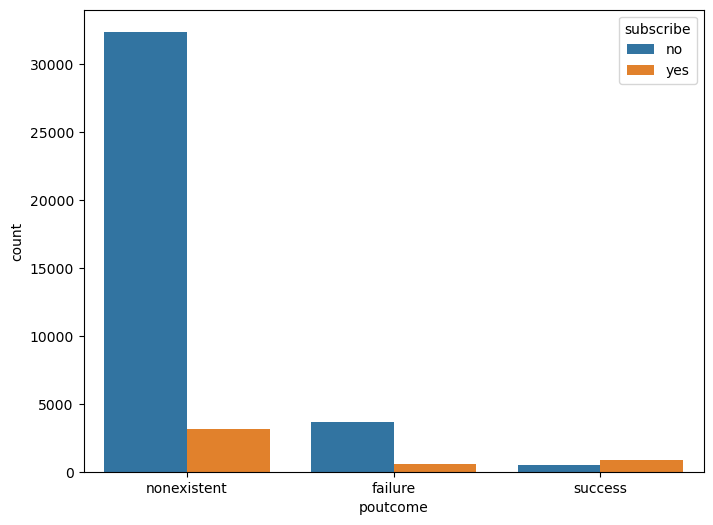

In [341]:
# Counts of poutcome by subscrption

plt.figure(figsize=(8, 6))
sns.countplot(x = 'poutcome', data = data1, hue = 'subscribe')
plt.show()

In [342]:
pd.crosstab(index = data1['poutcome'], columns = data1['subscribe'], margins=True, margins_name = 'total')

subscribe,no,yes,total
poutcome,,,
failure,3647,605,4252
nonexistent,32411,3140,35551
success,479,894,1373
total,36537,4639,41176


findings from the bivariate analysis
* the average age of customers who subscribe to term deposit is almost same as who did not subscribe to term deposit.
* the average duration of customers who subscribe to term deposit is 553 seconds and the average duration of customers who did   not subscribe to term deposit is 220 seconds, it means customers who have long call duration are more likely to subscribe to   the term deposit.
* the average number of contacts that are performed to customers who subscribe to term deposit is less compared to who did not   subscribe to term deposit.
* most number of customers who subscribed to term deposit have admin job.
* the high number of customers who subscribe who term deposit are married people.
* most people who subscribe to term deposit have university education.
* the high number of customers who subscribe to term deposit have housing loan.
* the less number of customers who subscribe to term deposit have personal loan.
* most customers who subscribed to term deposit were contacted through cellular.
* the high number customers who subscribe to term deposi are contacted in the month of may followed by august, july and april.

In [343]:
data1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribe
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin,married,basic,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,no,yes,telephone,may,mon,nonexistent,no


In [344]:
# check significance of independent categrical features through chi2 hypothesis testing

from scipy.stats import chi2_contingency

categorical_columns = data1.select_dtypes(include='object').drop(columns='subscribe').columns
for col in categorical_columns:
    contingency_table = pd.crosstab(data1[col], data1['subscribe'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    if p_value < 0.05:
        print(f"Reject Null Hypothesis: There is significant association between {col} and subscription")
    else:
        print(f"Fail To Reject Null Hypothesis: There is no significant association between {col} and subscription")

Reject Null Hypothesis: There is significant association between job and subscription
Reject Null Hypothesis: There is significant association between marital and subscription
Reject Null Hypothesis: There is significant association between education and subscription
Fail To Reject Null Hypothesis: There is no significant association between default and subscription
Reject Null Hypothesis: There is significant association between housing and subscription
Fail To Reject Null Hypothesis: There is no significant association between loan and subscription
Reject Null Hypothesis: There is significant association between contact and subscription
Reject Null Hypothesis: There is significant association between month and subscription
Reject Null Hypothesis: There is significant association between day_of_week and subscription
Reject Null Hypothesis: There is significant association between poutcome and subscription


we select the relevant features from the above test

In [345]:
data1.drop(columns=['default', 'loan'], axis=1, inplace=True)

In [346]:
data1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,contact,month,day_of_week,poutcome,subscribe
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic,no,telephone,may,mon,nonexistent,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,telephone,may,mon,nonexistent,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,yes,telephone,may,mon,nonexistent,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin,married,basic,no,telephone,may,mon,nonexistent,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,telephone,may,mon,nonexistent,no


In [347]:
#label the target feature

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data1['subscribe'] = encoder.fit_transform(data1['subscribe'])
data1['subscribe']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: subscribe, Length: 41176, dtype: int32

In [348]:
# now we perfrom feature selection for numerical features

from sklearn.feature_selection import mutual_info_classif

numerical_data = data1.select_dtypes(include=['int', 'float']).drop(columns='subscribe')
target_variable = data1['subscribe']

mi_features = mutual_info_classif(numerical_data, target_variable)
mi_features_data = pd.Series(mi_features, index = numerical_data.columns)
mi_features_data.sort_values(ascending=False)

duration          0.076785
euribor3m         0.073703
cons.price.idx    0.069121
cons.conf.idx     0.067186
nr.employed       0.066993
emp.var.rate      0.054894
pdays             0.039505
previous          0.018540
age               0.014500
campaign          0.003260
dtype: float64

since there is no single feature with 0 mutual information value, i include all the features since the have some amount of relevance to target variable but i remove duration variable from the annalysis since we are bulding project to predict whether the customer will subscribe to term deposit or not and main objective of the project is reaching out to customers who are likely to subscribe to term deposit so here before duration will not be known before making the call to customer.

In [349]:
data1.drop(columns='duration', inplace=True)

In [350]:
data1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,housing,contact,month,day_of_week,poutcome,subscribe
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,housemaid,married,basic,no,telephone,may,mon,nonexistent,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,telephone,may,mon,nonexistent,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,yes,telephone,may,mon,nonexistent,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,admin,married,basic,no,telephone,may,mon,nonexistent,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,services,married,high_school,no,telephone,may,mon,nonexistent,0


In [351]:
#encoding the categorical features

categorical_columns = data1.select_dtypes(include='object').columns
data1 = pd.get_dummies(data1, columns=categorical_columns, dtype=int, drop_first=True)
data1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high_school,education_illiterate,education_professional_course,education_university,housing_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [352]:
X = data1.drop(columns='subscribe')
y = data1['subscribe']

In [353]:
#splitting data into train and test parts for model building

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [354]:
# scaling the data 

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)
X_train_data = pd.DataFrame(train_scaled, index = X_train.index, columns = X_train.columns)
X_test_data = pd.DataFrame(test_scaled, index = X_test.index, columns = X_test.columns)

In [355]:
X_train_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high_school,education_illiterate,education_professional_course,education_university,housing_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
27506,1.266667,0.0,0.0,0.0,-0.37500,-0.597388,-0.031746,-0.231131,0.037209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20991,0.400000,-0.5,0.0,0.0,0.09375,-0.331882,0.904762,0.029583,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34380,-0.466667,-0.5,0.0,1.0,-0.90625,-0.931447,-0.698413,-0.992812,-0.712403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
17259,1.000000,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.029030,0.287597,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15329,-0.466667,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.027647,0.287597,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,-0.400000,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000829,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8970,-0.333333,-0.5,0.0,0.0,0.09375,0.779108,0.000000,0.002488,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33752,-0.533333,-0.5,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.988665,-0.712403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18503,-0.266667,-0.5,0.0,0.0,0.09375,0.183896,-0.142857,0.030688,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [356]:
X_test_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_high_school,education_illiterate,education_professional_course,education_university,housing_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
12694,0.800000,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.028477,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
879,0.666667,-0.5,0.0,0.0,0.00000,0.266594,0.857143,-0.000276,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12340,1.000000,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.028200,0.287597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.400000,-0.5,0.0,0.0,0.00000,0.266594,0.857143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19257,-0.466667,0.0,0.0,0.0,0.09375,-0.331882,0.904762,0.030412,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31265,-0.333333,0.0,0.0,1.0,-0.90625,-0.931447,-0.698413,-0.974012,-0.712403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
18664,0.000000,16.0,0.0,0.0,0.09375,0.183896,-0.142857,0.030688,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17025,-0.866667,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.029030,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18902,0.733333,-0.5,0.0,0.0,0.09375,-0.331882,0.904762,0.031241,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Model Building

before model building we need to understand the types of cost associate with errors, there are two types of errors

* False Postives  -- if the model predicts the customer will subscribe to the term deposit but actually the customer does not                        then this error is called False Postive. this type error will cost the bank to reach to customers who                          basically will not subscribe to the term deposit, so here the loss is some cast associate with reaching to                      customers.
* False Negatives -- if the model predicts the customer will not subscribe to term deposit but actually the customer does then                      this error is called False Negative. this type error will cost the bank losing the potential lead or                            customer who actually have high chances of subscribing to term deposit, so here the loss the high amout                        the customer can put to buy the product, for example lets say the term deposit that the bank wants to sell                      is CHF 100,000 then the bank will loss that much amount for each customer, where the bank can use that                          money on certain other products to improve business profit.

here comparing the both error the cost false negatives is very high bank so our focus is to build and select models with less number of false negatives by prioritizing recall metric.

In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

In [358]:
def build_classifcation_models(x_train, y_train, x_test, y_test):
    models = {"Logistic Regression" : lg_model,
             "Decision Tree" : dt_model,
             "Random Forest" : rf_model,
             "Ada Boost" : ab_model,
             "Gradient Boosting" : gb_model}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print(f"Model:{name}")
        print()
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("F1-score:", f1_score(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print()

build_classifcation_models(X_train_data, y_train, X_test_data, y_test)

Model:Logistic Regression

Accuracy: 0.8982433416983728
Precision: 0.6374745417515275
Recall: 0.22485632183908047
F1-score: 0.33244822092405735
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10961
           1       0.64      0.22      0.33      1392

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.64     12353
weighted avg       0.88      0.90      0.88     12353

Confusion Matrix:
[[10783   178]
 [ 1079   313]]

Model:Decision Tree

Accuracy: 0.8406055209260909
Precision: 0.30034602076124567
Recall: 0.3117816091954023
F1-score: 0.3059569968276348
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10961
           1       0.30      0.31      0.31      1392

    accuracy                           0.84     12353
   macro avg       0.61      0.61      0.61     12353
weighted avg       0.84 

since, there is class imbalance the performance on the minority class very less. we can build models by handling the class imbalance using two approaches 
1. class_weights
2. smote

In [359]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
print(class_weights)

[0.56347748 4.43840468]


In [360]:
lg_model = LogisticRegression(class_weight = {0 : 0.56347748, 1 : 4.43840468})
dt_model = DecisionTreeClassifier(class_weight = {0 : 0.56347748, 1 : 4.43840468})
rf_model = RandomForestClassifier(class_weight = {0 : 0.56347748, 1 : 4.43840468})

build_classifcation_models(X_train_data, y_train, X_test_data, y_test)

Model:Logistic Regression

Accuracy: 0.8266817777058204
Precision: 0.35273299252850965
Recall: 0.6443965517241379
F1-score: 0.4559085133418043
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     10961
           1       0.35      0.64      0.46      1392

    accuracy                           0.83     12353
   macro avg       0.65      0.75      0.68     12353
weighted avg       0.88      0.83      0.85     12353

Confusion Matrix:
[[9315 1646]
 [ 495  897]]

Model:Decision Tree

Accuracy: 0.8379341050756901
Precision: 0.3022049286640726
Recall: 0.33477011494252873
F1-score: 0.3176550783912747
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10961
           1       0.30      0.33      0.32      1392

    accuracy                           0.84     12353
   macro avg       0.61      0.62      0.61     12353
weighted avg       0.85      

the recall performance for logistic regression improved after handling class imbalance using class weights approcah, the recall for logistic regression is 64%

In [361]:
# now we handle class imbalance by using smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_data, y_train)
y_train_resample.value_counts()

subscribe
0    25576
1    25576
Name: count, dtype: int64

In [362]:
lg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

build_classifcation_models(X_train_resample, y_train_resample, X_test_data, y_test)

Model:Logistic Regression

Accuracy: 0.8155104023314175
Precision: 0.33652782897161815
Recall: 0.6558908045977011
F1-score: 0.4448233861144945
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     10961
           1       0.34      0.66      0.44      1392

    accuracy                           0.82     12353
   macro avg       0.64      0.75      0.67     12353
weighted avg       0.88      0.82      0.84     12353

Confusion Matrix:
[[9161 1800]
 [ 479  913]]

Model:Decision Tree

Accuracy: 0.8383388650530236
Precision: 0.30986800754242616
Recall: 0.3541666666666667
F1-score: 0.33053972510895074
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10961
           1       0.31      0.35      0.33      1392

    accuracy                           0.84     12353
   macro avg       0.61      0.63      0.62     12353
weighted avg       0.85     

after handling class imbalance using smote techniques the recall performance of logistic regression is 65% with default hyperparameters.

In [381]:
# checing the imprtance of independant varaibels on the target variable with logistci regression model coefficients

lg_model = LogisticRegression()
lg_model.fit(X_train_resample, y_train_resample)
coefficients = lg_model.coef_[0]
feature_names = X_train_data.columns

coef_table = pd.DataFrame({'Feature' : feature_names, 'Coefficient' : coefficients})
coef_table.sort_values(by = 'Coefficient', ascending = False)

,Feature,Coefficient
31,month_mar,0.386210
40,poutcome_nonexistent,0.378792
5,cons.price.idx,0.266444
13,job_retired,0.231391
19,marital_married,0.223186
34,month_oct,0.221368
6,cons.conf.idx,0.213007
29,month_jul,0.197154
20,marital_single,0.142507
24,education_university,0.114820


-- influence of important independent features on target feature

* month_mar            : customer contacted in march are more likely to subscribe.
* poutcome_nonexistent : customers with no previous marketing outcome are more likely to subscribe.
* month_may            : customers contacted in may are less likely to subscribe.
* martial_married      : married customers are likely to subscribe.
* contact_telephone    : customers contacted via telephone are less likely to subscribe.
* job_unemployeed      : customers who are unemployeed are less likely to subscribe.
* job_retired          : retired customers are more likely to subscribe.
* nr.employed          : higher number of employees decreses the likelihood of subscription.
* previous             : customers who were contacted during previous marketing are less likely to subscribe.
* education_university : customers with university education are more likely to subscribe becuase they may have better                                  financial stability.
* month_may            : customer contacted in may are less likely to subscribe.
* emp.var.rate         : customers who have high employment variation rate are less likely to subscribe.
* job_servies          : customers in service jobs are less likely to subscribe.

In [382]:
# saving the model
import pickle
filename = 'final_model.sav'
pickle.dump(lg_model, open(filename, 'wb'))